<a href="https://colab.research.google.com/github/ChitrakCDB/MachineLearningAlgorithms/blob/main/Detailed_Analysis_of_Classification_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DRY BEAN DATASET**

In [ ]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files
import seaborn as sns

In [ ]:
from google.colab import drive #to import the google drive data

In [ ]:

drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Files"

/content/drive/My Drive/Colab Notebooks/Files


In [ ]:
dataset = pd.read_csv("DBD.csv")


In [ ]:
dataset

Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4  Class
0      28395    610.291       208.178117  ...      0.834222      0.998724      1
1      28734    638.018       200.524796  ...      0.909851      0.998430      1
2      29380    624.110       212.826130  ...      0.825871      0.999066      1
3      30008    645.884       210.557999  ...      0.861794      0.994199      1
4      30140    620.134       201.847882  ...      0.941900      0.999166      1
...      ...        ...              ...  ...           ...           ...    ...
13606  42097    759.696       288.721612  ...      0.642988      0.998385      7
13607  42101    757.499       281.576392  ...      0.676099      0.998219      7
13608  42139    759.321       281.539928  ...      0.676884      0.996767      7
13609  42147    763.779       283.382636  ...      0.668237      0.995222      7
13610  42159    772.237       295.142741  ...      0.616221      0.998180      7

[13611 rows x 17 columns]

In [ ]:

dataset.describe()

Area     Perimeter  ...  ShapeFactor4         Class
count   13611.000000  13611.000000  ...  13611.000000  13611.000000
mean    53048.284549    855.283459  ...      0.995063      4.631181
std     29324.095717    214.289696  ...      0.004366      2.151782
min     20420.000000    524.736000  ...      0.947687      1.000000
25%     36328.000000    703.523500  ...      0.993703      3.000000
50%     44652.000000    794.941000  ...      0.996386      5.000000
75%     61332.000000    977.213000  ...      0.997883      7.000000
max    254616.000000   1985.370000  ...      0.999733      7.000000

[8 rows x 17 columns]

In [ ]:
X_inputFeatures = dataset.iloc[:,[3,4,5,12]] #seprating indipendent input feature

In [ ]:
Y_targetVariable = dataset.iloc[:,-1]  #seprating target variable

In [ ]:
isSEKER=dataset.loc[Y_targetVariable==1]

In [ ]:
isBARBUNYA=dataset.loc[Y_targetVariable==2]

In [ ]:
isBOMBAY=dataset.loc[Y_targetVariable==3]

In [ ]:
isCALI=dataset.loc[Y_targetVariable==4]

In [ ]:
isHOROZ=dataset.loc[Y_targetVariable==5]

In [ ]:
isSIRA=dataset.loc[Y_targetVariable==6]

In [ ]:
isDERMASON=dataset.loc[Y_targetVariable==7]

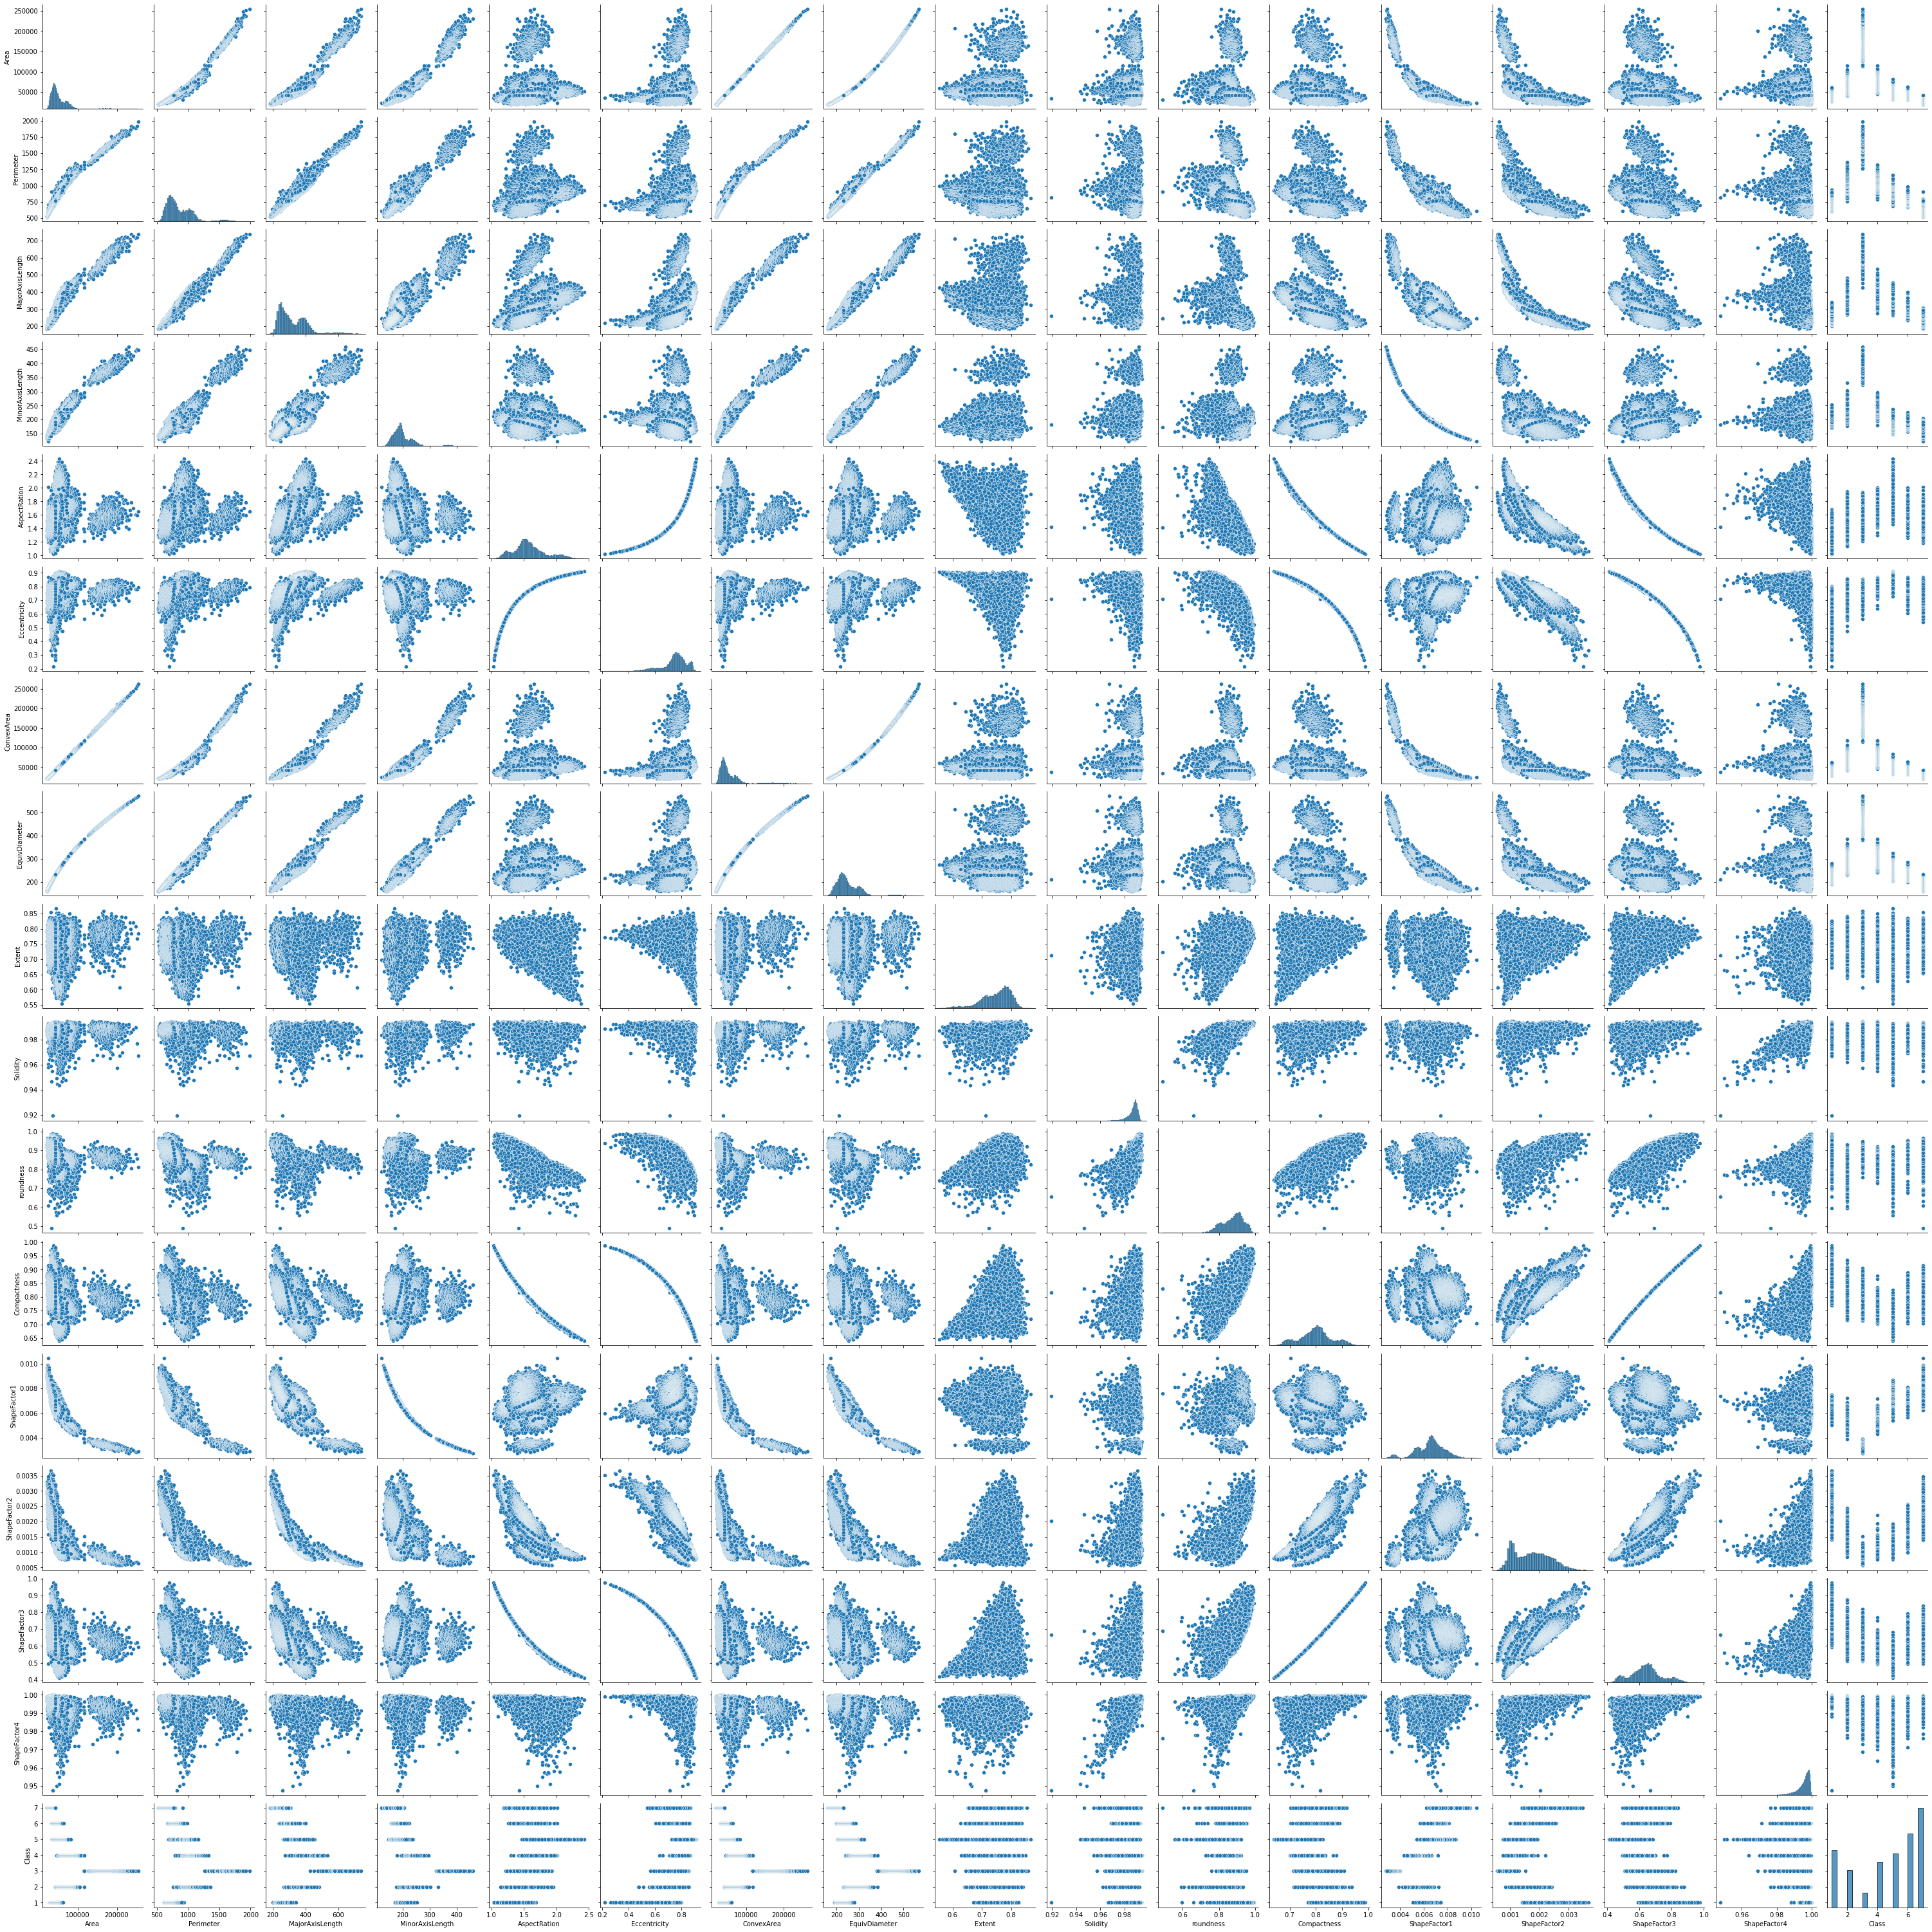

In [ ]:
sns.pairplot(dataset[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']])
plt.show()

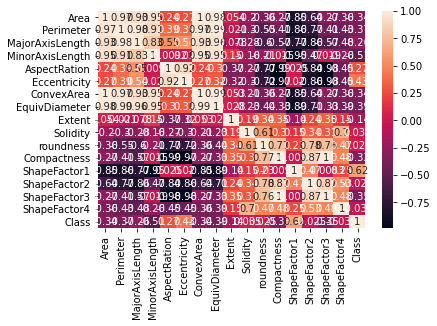

In [ ]:
sns.heatmap(dataset[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']].corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split #library for training and testing

In [ ]:
#converting to array
X_inputFeatures=np.array(X_inputFeatures)
Y_targetVariable=np.array(Y_targetVariable)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_inputFeatures,Y_targetVariable,test_size=0.30,random_state=48) #first train and test data for feature

In [ ]:
# seeing seprated values
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(9527, 4)
(4084, 4)
(9527,)
(4084,)


**Performing KNN** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  #importing KNN Classifier library

In [ ]:
knn_model_evaluation_K_3 = KNeighborsClassifier(n_neighbors=3) 

In [ ]:
knn_model_evaluation_K_3.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
Y_pred_model_k_3 = knn_model_evaluation_K_3.predict(X_test)

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred_model_k_3)
confusion_matrix

array([[533,  15,   0,   1,   0,  19,   9],
       [  3, 246,   1,  90,   1,  24,   0],
       [  0,   0, 160,   0,   0,   0,   0],
       [  1, 118,   0, 404,   9,   2,   0],
       [  2,   7,   0,  21, 512,  25,   9],
       [ 34,  17,   0,   0,  19, 618, 120],
       [ 23,   0,   0,   0,   3, 107, 931]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_3))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_3,average='weighted'))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_3,average='weighted'))

Accuracy: 0.8334965719882468
Precision: 0.8356465143013637
Recall: 0.8334965719882468


Confusion matrix for k =  1 is:
 [[513  12   0   1   1  28  22]
 [  3 247   1  88   3  23   0]
 [  0   0 160   0   0   0   0]
 [  1 135   0 380  16   2   0]
 [  0   5   0  23 511  28   9]
 [ 29  24   0   2  30 608 115]
 [ 20   0   0   0   4 120 920]]
Accuracy of the model for k =  1 is:  0.8175808031341821
Precision of the model for k =  1 is:  0.8208493738908459
Recall of the model for k =  1 is:  0.8175808031341821
Confusion matrix for k =  2 is:
 [[538  11   0   0   0  22   6]
 [  8 289   1  50   1  16   0]
 [  0   0 160   0   0   0   0]
 [  1 212   0 309  10   2   0]
 [  1   9   0  27 515  19   5]
 [ 57  39   0   3  42 596  71]
 [ 41   0   0   0   6 175 842]]
Accuracy of the model for k =  2 is:  0.795543584720862
Precision of the model for k =  2 is:  0.8126004963788942
Recall of the model for k =  2 is:  0.795543584720862
Confusion matrix for k =  3 is:
 [[533  15   0   1   0  19   9]
 [  3 246   1  90   1  24   0]
 [  0   0 160   0   0   0   0]
 [  1 118   0 404   9   2   0]
 [ 

Text(0, 0.5, 'Accuracy')

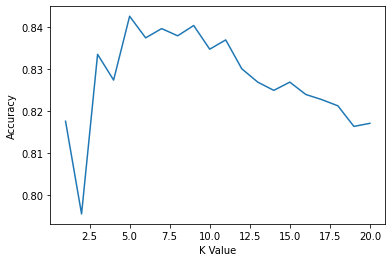

In [ ]:
accuracy = []
k = [i for i in range(1,21)]
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  prediction_model = knn.predict(X_test)
  #Calculating confusion matrix
  conf_matrix = metrics.confusion_matrix(Y_test,prediction_model)
  print("Confusion matrix for k = ",i,"is:\n",conf_matrix)
  #Calculating the accuracy, precision and recall of the model
  accuracy.append(metrics.accuracy_score(Y_test, prediction_model))
  print("Accuracy of the model for k = ",i,"is: ",metrics.accuracy_score(Y_test, prediction_model))
  print("Precision of the model for k = ",i,"is: ",metrics.precision_score(Y_test, prediction_model,average='weighted'))
  print("Recall of the model for k = ",i,"is: ",metrics.recall_score(Y_test, prediction_model,average='weighted'))

plt.plot(k,accuracy)
plt.xlabel("K Value")
plt.ylabel("Accuracy")

From the above graph we can see the most accurate value is on K=5 

*so we can say it is the best value of K*

**Performing RandomForest **

In [ ]:
dataset_list=list( dataset.iloc[:,[3,4,5,12]] .columns)


In [ ]:

from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=1000,random_state=42)

In [ ]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
predictions=rf.predict(X_test)

In [ ]:
predictions

array([7, 4, 6, ..., 4, 3, 6])

In [ ]:
errors=abs(predictions-Y_test)

In [ ]:
errors

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#Mean Absolute Percentage Error
mape=100*(errors/Y_test)

mean_error=np.mean(mape)


In [ ]:
accuracy = 100 - mean_error

In [ ]:
accuracy

89.64396483372977

In [ ]:
from sklearn.tree import export_graphviz
import pydot

In [ ]:
tree=rf.estimators_[5]
export_graphviz(tree,out_file='AssignmentTree.dot',feature_names=dataset_list,rounded=True,)

In [ ]:
(graph,)=pydot.graph_from_dot_file('AssignmentTree.dot')
graph.write_png('AssignmentTree.png')

Conclusion: The accuracy givenn by Random Forest is much better than KNN

**Performing K-Means and Hierarchial**

In [ ]:
import scipy.cluster.hierarchy as sch

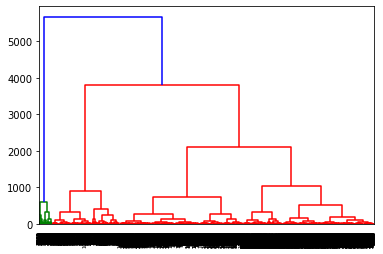

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(X_inputFeatures, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc=AgglomerativeClustering(n_clusters=7,linkage='ward')

In [ ]:
y_hc=hc.fit_predict(X_inputFeatures)

In [ ]:
y_hc

array([2, 2, 2, ..., 6, 6, 2])

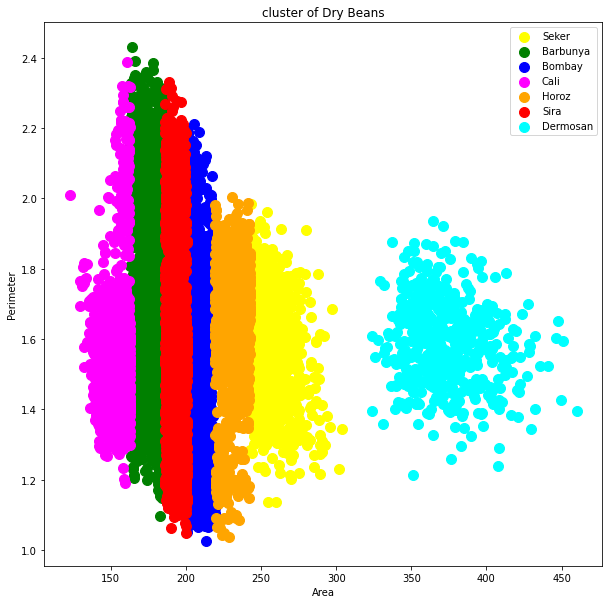

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_inputFeatures[y_hc==1,0],X_inputFeatures[y_hc==1,1],s=100,c='yellow',label='Seker')
plt.scatter(X_inputFeatures[y_hc==2,0],X_inputFeatures[y_hc==2,1],s=100,c='green',label='Barbunya')
plt.scatter(X_inputFeatures[y_hc==3,0],X_inputFeatures[y_hc==3,1],s=100,c='blue',label='Bombay')
plt.scatter(X_inputFeatures[y_hc==4,0],X_inputFeatures[y_hc==4,1],s=100,c='magenta',label='Cali')
plt.scatter(X_inputFeatures[y_hc==5,0],X_inputFeatures[y_hc==5,1],s=100,c='orange',label='Horoz')
plt.scatter(X_inputFeatures[y_hc==6,0],X_inputFeatures[y_hc==6,1],s=100,c='red',label='Sira')
plt.scatter(X_inputFeatures[y_hc==0,0],X_inputFeatures[y_hc==0,1],s=100,c='cyan',label='Dermosan')
plt.title('cluster of Dry Beans')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()

**K-Means**

In [ ]:
from sklearn.cluster import KMeans

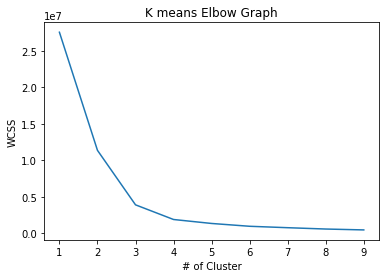

In [ ]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_inputFeatures)
    wcss.append(kmeans.inertia_)        #residual values which we are having.
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=7,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X_inputFeatures)

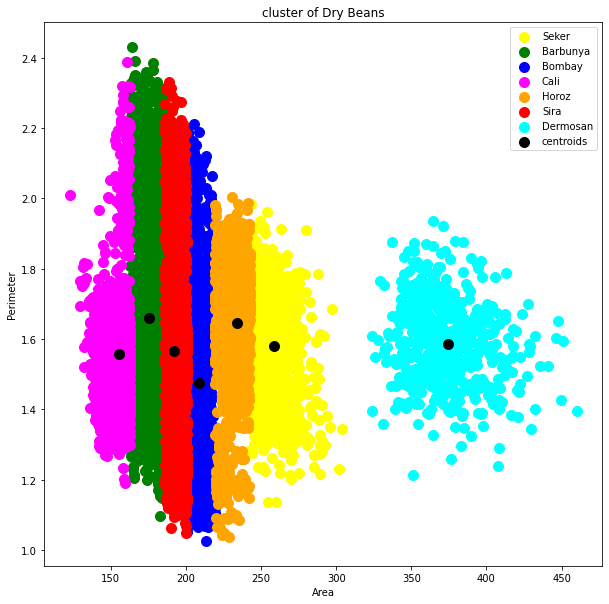

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_inputFeatures[y_hc==1,0],X_inputFeatures[y_hc==1,1],s=100,c='yellow',label='Seker')
plt.scatter(X_inputFeatures[y_hc==2,0],X_inputFeatures[y_hc==2,1],s=100,c='green',label='Barbunya')
plt.scatter(X_inputFeatures[y_hc==3,0],X_inputFeatures[y_hc==3,1],s=100,c='blue',label='Bombay')
plt.scatter(X_inputFeatures[y_hc==4,0],X_inputFeatures[y_hc==4,1],s=100,c='magenta',label='Cali')
plt.scatter(X_inputFeatures[y_hc==5,0],X_inputFeatures[y_hc==5,1],s=100,c='orange',label='Horoz')
plt.scatter(X_inputFeatures[y_hc==6,0],X_inputFeatures[y_hc==6,1],s=100,c='red',label='Sira')
plt.scatter(X_inputFeatures[y_hc==0,0],X_inputFeatures[y_hc==0,1],s=100,c='cyan',label='Dermosan')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroids')
plt.title('cluster of Dry Beans')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
X=StandardScaler().fit_transform(X_inputFeatures)

In [ ]:
X

array([[-0.63115304, -1.56505251, -2.18572039,  0.68078638],
       [-0.43444458, -1.96978438, -3.68603953,  0.3679669 ],
       [-0.58573462, -1.51429132, -2.04533608,  0.60312889],
       ...,
       [-0.24645586, -0.4486176 , -0.18293961,  0.10426946],
       [-0.26674226, -0.38073532, -0.10695995,  0.14190638],
       [-0.44622403,  0.14837437,  0.38911648,  0.38751213]])

In [ ]:
ns=4

In [ ]:
nearsetneighbours=NearestNeighbors(5).fit(X)

In [ ]:
distances,indices=nearsetneighbours.kneighbors(X)

In [ ]:
distances

array([[0.        , 0.17429278, 0.30121111, 0.30934743, 0.31057071],
       [0.        , 0.38760614, 0.39018854, 0.43268527, 0.44594904],
       [0.        , 0.17429278, 0.18229788, 0.23306629, 0.23815363],
       ...,
       [0.        , 0.01775595, 0.02310055, 0.02665057, 0.02734826],
       [0.        , 0.01704591, 0.01827317, 0.02180426, 0.02305286],
       [0.        , 0.01187319, 0.02085066, 0.02284125, 0.02420193]])

In [ ]:
distanceDec=sorted(distances[:,4],reverse=True)

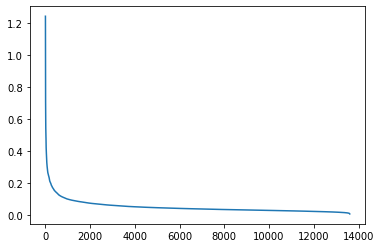

In [ ]:
plt.plot(indices[:,0],distanceDec)

In [ ]:
db=DBSCAN(eps=0.2,min_samples=5).fit(X)

In [ ]:
labels=db.labels_ #-1 is noise points

In [ ]:
db.core_sample_indices_ #core datapoints

array([    3,     5,     6, ..., 13608, 13609, 13610])

In [ ]:
core_samples_mask=np.zeros_like(db.labels_,dtype=bool)

In [ ]:
core_samples_mask

array([False, False, False, ..., False, False, False])

In [ ]:
n_clusters_=len(set(labels))-1

In [ ]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
len(set(labels))

9

In [ ]:
unique_labels=set(labels)

In [ ]:
colors=[plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_labels))]

In [ ]:
colors #RGBA A-alpha it gives the transparency

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.6703575547866205, 0.0602076124567474, 0.27081891580161477, 1.0),
 (0.7295655517108804, 0.12587466359092656, 0.2848135332564398, 1.0),
 (0.7887735486351404, 0.19154171472510573, 0.29880815071126493, 1.0),
 (0.8376778162245291, 0.2467512495194156, 0.308881199538639, 1.0),
 (0.8710495963091118, 0.2973471741637831, 0.2959630911188005, 1.0),
 (0.9044213763936948, 0.34794309880815066, 0.28304498269896194, 1.0),
 (0.9377931564782777, 0.39853902345251824, 0.2701268742791234, 1.0),
 (0.9596309111880047, 0.44744329104190683, 0.2719723183391003, 1.0),
 (0.9693194925028835, 0.5174163783160323, 0.30426758938869664, 1.0),
 (0.9790080738177624, 0.5873894655901576, 0.3365628604382929, 1.0),
 (0.9886966551326413, 0.6573625528642827, 0.36885813148788915, 1.0),
 (0.9926951172625913, 0.7092656670511341, 0.40299884659746243, 1.0),
 (0.9937716262975779, 0.7630911188004613, 0.44821222606689726, 1.0),
 (0.9948481353325644, 0.81691657054

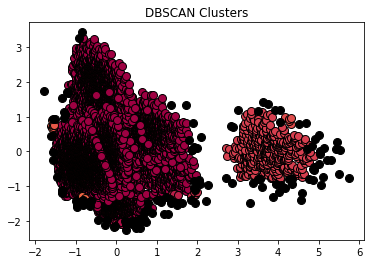

In [ ]:
for k,col in zip(unique_labels,colors):
  if(k==-1):
    col=[0,0,0,1] #noise points
  noise_mask=(labels==k)

  y=X[core_samples_mask & noise_mask]

  plt.plot(y[:,0],y[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=15)  #core datapoints

  y=X[~core_samples_mask & noise_mask]  

  plt.plot(y[:,0],y[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=8)  #core datapoints

plt.title('DBSCAN Clusters')
plt.show()